In [622]:
%store -r train_mod 
%store -r test_mod

In [623]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87264 entries, 0 to 89377
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              87263 non-null  object 
 1   brand                 87264 non-null  object 
 2   color                 87264 non-null  object 
 3   fuelType              87264 non-null  object 
 4   modelDate             87263 non-null  float64
 5   name                  87263 non-null  object 
 6   numberOfDoors         87263 non-null  float64
 7   productionDate        87264 non-null  int64  
 8   vehicleConfiguration  87263 non-null  object 
 9   vehicleTransmission   87263 non-null  object 
 10  engineDisplacement    87263 non-null  object 
 11  enginePower           87263 non-null  float64
 12  description           84031 non-null  object 
 13  mileage               87264 non-null  int64  
 14  –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è          87264 non-null  object 
 15  –ü—Ä–∏–

In [624]:
test_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [625]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder

In [626]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)

Python       : 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
Numpy        : 1.22.3


##### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—â–∏—Ö –∏ —Ä–∞–∑–ª–∏—á–∞—é—â–∏—Ö—Å—è —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ TRAIN –∏ TEST

In [627]:
#–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã
common_columns = set(test_mod.columns).intersection(train_mod.columns)

#–¢–æ–ª—å–∫–æ –≤ TEST
test_only_columns = set(test_mod.columns).difference(train_mod.columns)

#–¢–æ–ª—å–∫–æ –≤ TRAIN
train_only_columns = set(train_mod.columns).difference(test_mod.columns)

In [628]:
#–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ–º —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
index_list = test_mod[common_columns].dtypes.index.to_list()
test_list = test_mod[common_columns].dtypes.values.tolist()
train_list = train_mod[common_columns].dtypes.values.tolist()

dict_comparison = {
    'title': index_list,
    'test_type': test_list,
    'train_type': train_list
}

comparison = pd.DataFrame(dict_comparison)
comparison.sort_values('title')

C:\Temp\ipykernel_7588\3330007078.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  index_list = test_mod[common_columns].dtypes.index.to_list()
C:\Temp\ipykernel_7588\3330007078.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_list = test_mod[common_columns].dtypes.values.tolist()
C:\Temp\ipykernel_7588\3330007078.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_list = train_mod[common_columns].dtypes.values.tolist()


title test_type train_type
5               bodyType    object     object
8                  brand    object     object
3                  color    object     object
2            description    object     object
13    engineDisplacement    object     object
10           enginePower    object    float64
1               fuelType    object     object
12               mileage     int64      int64
17             modelDate     int64    float64
7                   name    object     object
14         numberOfDoors     int64    float64
18        productionDate     int64      int64
15  vehicleConfiguration    object     object
11   vehicleTransmission    object     object
9              –í–ª–∞–¥–µ–ª—å—Ü—ã    object    float64
6               –í–ª–∞–¥–µ–Ω–∏–µ    object     object
16                   –ü–¢–°    object     object
20                –ü—Ä–∏–≤–æ–¥    object     object
4                   –†—É–ª—å    object     object
19             –°–æ—Å—Ç–æ—è–Ω–∏–µ    object    float64
0                –¢–∞–º–æ–∂–Ω—è    object       bool

–ö–∞–∫ –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —Ñ–æ—Ä–º–∞—Ç –¥–∞–Ω–Ω—ã—Ö –≤ —á–∞—Å—Ç–∏ —Å—Ç–æ–ª–±—Ü–æ–≤ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç. –¢–∞–∫–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Å–æ–¥–µ—Ä–∂–∞–∏–º–æ–µ —è—á–µ–µ–∫.

In [629]:
#–°–æ–∑–¥–∞–¥–∏–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ–º –≤–Ω–æ—Å–∏—Ç—å –∏–º–µ–Ω–∞ —Å—Ç–æ–ª–±—Ü–æ–≤, –ø–æ–¥–ª–µ–∂–∞—â–∏—Ö —É–¥–∞–ª–µ–Ω–∏—é. 
#–±—É–¥–µ–º –∑–∞–ø–æ–ª–Ω—è—Ç—å –µ–≥–æ –ø–æ —Ö–æ–¥—É –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.
columns_to_drop = []

##### –ë—Ä–µ–Ω–¥—ã –≤ TRAIN –∏ TEST

In [630]:
display(train_mod.brand.unique())
print('–í—Å–µ–≥–æ –≤ TRAIN',len(train_mod.brand.unique()),'–±—Ä–µ–Ω–¥–æ–≤.',sep=' ')

array(['AUDI', 'BMW', 'CADILLAC', 'CHERY', 'CHEVROLET', 'CHRYSLER',
       'CITROEN', 'DAEWOO', 'DODGE', 'FORD', 'GEELY', 'HONDA', 'HYUNDAI',
       'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LEXUS', 'MAZDA', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT',
       'SKODA', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'GREAT_WALL', 'LAND_ROVER', 'MERCEDES', 'SSANG_YONG'], dtype=object)

–í—Å–µ–≥–æ –≤ TRAIN 36 –±—Ä–µ–Ω–¥–æ–≤.


In [631]:
display(test_mod.brand.unique())
print('–í—Å–µ–≥–æ –≤ TEST',len(test_mod.brand.unique()),'–±—Ä–µ–Ω–¥–æ–≤.',sep=' ')

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI'],
      dtype=object)

–í—Å–µ–≥–æ –≤ TEST 12 –±—Ä–µ–Ω–¥–æ–≤.


## –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤ –≤ TEST

Text(0.5, 1.0, 'TEST brands')

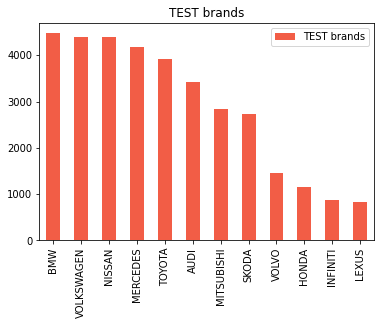

In [632]:
test_mod['brand'].value_counts().plot(kind='bar', color = '#F25D46', label='TEST brands')
plt.legend()
plt.title('TEST brands')

## –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤ –≤ TRAIN

Text(0.5, 1.0, 'TRAIN brands')

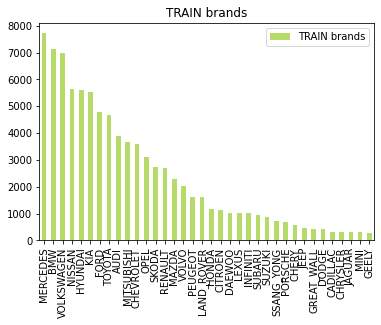

In [633]:
train_mod['brand'].value_counts().plot(kind='bar', color = '#B6DB69', label='TRAIN brands')
plt.legend()
plt.title('TRAIN brands')

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø–µ—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö —Ç–æ–ª—å–∫–æ –≤–æ TEST, —Å—Ö–æ–∂–µ —Å TRAIN. 

–ü–æ—ç—Ç–æ–º—É –¥–ª—è –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ ML –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å, –æ–¥–Ω–∞–∫–æ –¥–ª—è Staking –∏ –∞–Ω—Å–∞–º–±–ª–µ–π –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∏ —É–¥–∞–ª–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –≤ –∫–ª–∞—Å—Å—ã –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

##### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —è—á–µ–µ–∫ TRAIN –∏ TEST, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [634]:
#–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ–º —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
index_list = test_mod[common_columns].dtypes.index.to_list()
test_list = test_mod[common_columns].dtypes.values.tolist()
train_list = train_mod[common_columns].dtypes.values.tolist()

dict_comparison = {
    'title': index_list,
    'test_type': test_list,
    'train_type': train_list
}

comparison = pd.DataFrame(dict_comparison)
comparison.sort_values('title')

C:\Temp\ipykernel_7588\3330007078.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  index_list = test_mod[common_columns].dtypes.index.to_list()
C:\Temp\ipykernel_7588\3330007078.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_list = test_mod[common_columns].dtypes.values.tolist()
C:\Temp\ipykernel_7588\3330007078.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_list = train_mod[common_columns].dtypes.values.tolist()


title test_type train_type
5               bodyType    object     object
8                  brand    object     object
3                  color    object     object
2            description    object     object
13    engineDisplacement    object     object
10           enginePower    object    float64
1               fuelType    object     object
12               mileage     int64      int64
17             modelDate     int64    float64
7                   name    object     object
14         numberOfDoors     int64    float64
18        productionDate     int64      int64
15  vehicleConfiguration    object     object
11   vehicleTransmission    object     object
9              –í–ª–∞–¥–µ–ª—å—Ü—ã    object    float64
6               –í–ª–∞–¥–µ–Ω–∏–µ    object     object
16                   –ü–¢–°    object     object
20                –ü—Ä–∏–≤–æ–¥    object     object
4                   –†—É–ª—å    object     object
19             –°–æ—Å—Ç–æ—è–Ω–∏–µ    object    float64
0                –¢–∞–º–æ–∂–Ω—è    object       bool

In [635]:
#–§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö
def type_comparison(column):
    print('TEST')
    display(test_mod[column].sample(5))
    print('TRAIN')
    display(train_mod[column].sample(5))  

## bodyType

In [636]:
column = 'bodyType'
type_comparison(column)

TEST


16358    —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.
6327             —Å–µ–¥–∞–Ω
16229            —Å–µ–¥–∞–Ω
9349     —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.
10028          –ª–∏—Ñ—Ç–±–µ–∫
Name: bodyType, dtype: object

TRAIN


1768                 –°–µ–¥–∞–Ω
44597    –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.
78039      –£–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.
61105              –õ–∏—Ñ—Ç–±–µ–∫
67370    –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.
Name: bodyType, dtype: object

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É –∏ —É–±—Ä–∞—Ç—å –∏–∑ –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ–ª-–≤–æ –¥–≤–µ—Ä–µ–π

## color

In [637]:
column = 'color'
type_comparison(column)

TEST


32896        –±–µ–∂–µ–≤—ã–π
29877        –∑–µ–ª—ë–Ω—ã–π
32952    —Å–µ—Ä–µ–±—Ä–∏—Å—Ç—ã–π
10359        –±–µ–∂–µ–≤—ã–π
26726        –±–µ–∂–µ–≤—ã–π
Name: color, dtype: object

TRAIN


63694    040001
64900    97948F
57683    200204
75610    97948F
11779    EE1D19
Name: color, dtype: object

–ó–¥–µ—Å—å —Ç–∞–∫–∂–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

## description

In [638]:
column = 'description'
type_comparison(column)

TEST


2747     ‚Ä¢ –ê–≤—Ç–æ–º–æ–±–∏–ª—å –ø—Ä–æ–≤–µ—Ä–µ–Ω –ø–æ 110 –ø—É–Ω–∫—Ç–∞–º\n‚Ä¢ –ê–≤—Ç–æ–∫—Ä...
18656    –û—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–π –¥–∏–ª–µ—Ä Mercedes-Benz \n–û–û–û ¬´–†–û–õ–¨–§¬ª ...
32019    –ö–æ–º—Ñ–æ—Ä—Ç: 9. –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å: 5. –û–±–∑–æ—Ä: 2. –°–∞–ª–æ–Ω: ...
1708     –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å: 1. –°–∞–ª–æ–Ω: 2. –ö–æ–º—Ñ–æ—Ä—Ç: 3. –ó–∞—â–∏—Ç–∞ ...
19325    –ê–≤—Ç–æ–º–æ–±–∏–ª—å –≤ –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –≤—Å—ë —Ä–∞–±–æ—Ç–∞–µ—Ç...
Name: description, dtype: object

TRAIN


68999    –¢–æ–π–æ—Ç–∞ –¶–µ–Ω—Ç—Ä –õ–æ—Å–∏–Ω—ã–π –û—Å—Ç—Ä–æ–≤ - –¥–∏–ª–µ—Ä—Å–∫–∏–π —Ü–µ–Ω—Ç—Ä ...
25762    –¢–û –ø—Ä–æ–π–¥–µ–Ω–æ 16.09.2019 . –í–°–ï –í–û–ü–†–û–°–´ –ü–û –¢–ï–õ–ï–§–û...
87489    –ê–≤—Ç–æ —Ä–∞–¥—É–µ—Ç, –∫–∞–∫ –∏ —Ä–∞—Å—Ö–æ–¥. –í—Å–µ —Ä–∞–±–æ—Ç–∞–µ—Ç (–ø–Ω–µ–≤–º...
58228    –í–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å —Å–∏—Å—Ç–µ–º–∞–º–∏ TRADE-IN –∏ –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω...
25064    –∫–æ—Ü–∫–∏ –ø–æ –∫—É–∑–æ–≤—É, –Ω–∞ —Ö–æ–¥—É. –∫–æ—Ä–æ–±–∫–∞ –ø–µ—Ä–µ–∫–ª—é—á–∞–µ—Ç—Å...
Name: description, dtype: object

–ü–æ–∫–∞ –Ω–µ—è—Å–Ω–æ –º–æ–∂–Ω–æ –ª–∏ –∫–∞–∫-–ª–∏–±–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü

## engineDisplacement

In [639]:
column = 'engineDisplacement'
type_comparison(column)

TEST


21880    3.5 LTR
30628    3.0 LTR
1952     1.4 LTR
19899    2.8 LTR
27776    2.0 LTR
Name: engineDisplacement, dtype: object

TRAIN


53335     1.4
7674     650i
3533     2.0d
74171     1.2
70096     1.6
Name: engineDisplacement, dtype: object

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [640]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
def GetEngineDisplacement(x):
    row = str(x)
    engine = re.findall('\d\.\d', row)
    if engine == []:
        return None
    return float(engine[0])

train_mod['engineDisplacement'] = train_mod['engineDisplacement'].map(GetEngineDisplacement)
test_mod['engineDisplacement'] = test_mod['engineDisplacement'].map(GetEngineDisplacement)

In [641]:
column = 'engineDisplacement'
type_comparison(column)

TEST


24128    2.5
26998    1.6
15669    3.5
23275    2.0
33722    3.0
Name: engineDisplacement, dtype: float64

TRAIN


3622     4.1
30453    2.5
78707    2.0
86671    NaN
73536    1.6
Name: engineDisplacement, dtype: float64

–ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –ø–æ—è–≤–∏–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏

In [642]:
test_mod[test_mod['engineDisplacement'].isna()]

bodyType       brand  \
5241   –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.        AUDI   
7992       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8252       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8350       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8684       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8722       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8917       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
10817      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
10936      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
11043      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
11302      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11682      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11714      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11719      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11754      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11878      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11974      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12072      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12085      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12100      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12250      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12287      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12334      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12466      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12481      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12558      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12582      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12678      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12749      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12854      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12916      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12948      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12950      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13052      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13104      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13105      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13478      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13633      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13660      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13720      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13812      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13915      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13952      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13989      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
14147      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
14419      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
23869      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  VOLKSWAGEN   
23948      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  VOLKSWAGEN   
27064      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  MITSUBISHI   
28241      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  MITSUBISHI   
32668      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
32700      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
32798      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
34159      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.    MERCEDES   
34504      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   

                                                 car_url        color  \
5241   https://auto.ru/cars/used/sale/audi/e_tron/110...        –±–µ–ª—ã–π   
7992   https://auto.ru/cars/used/sale/bmw/i3/11010431...        —Å–∏–Ω–∏–π   
8252   https://auto.ru/cars/used/sale/bmw/i3/11012780...        —Å–µ—Ä—ã–π   
8350   https://auto.ru/cars/used/sale/bmw/i3/11002716...        –±–µ–ª—ã–π   
8684   https://auto.ru/cars/used/sale/bmw/i3/11011745...       —á—ë—Ä–Ω—ã–π   
8722   https://auto.ru/cars/used/sale/bmw/i3/11000973...      –≥–æ–ª—É–±–æ–π   
8917   https://auto.ru/cars/used/sale/bmw/i3/11008715...      –±–µ–∂–µ–≤—ã–π   
10817  https://auto.ru/cars/used/sale/bmw/i3/11012664...        —Å–µ—Ä—ã–π   
10936  https://auto.ru/cars/used/sale/bmw/i3/10996733...       —á—ë—Ä–Ω—ã–π   
11043  https://auto.ru/cars/used/sale/bmw/i3/10993761...        —Å–µ—Ä—ã–π   
11302  https://auto.ru/cars/used/sale/nissan/leaf/110...      –≥–æ–ª—É–±–æ–π   
11682  https://auto.ru/cars/used/sale/nissan/leaf/110...        –±–µ–ª—ã–π   
11714  https://auto.ru/cars/used/sale/nissan/leaf/109...        –±–µ–ª—ã–π   
11719  https://auto.ru/cars/used/sale/nissan/leaf/109...        –±–µ–ª—ã–π   
11754  https://auto.ru/cars/used/sale/nissan/leaf/110...        –±–µ–ª—ã–π   
11878  https://auto.ru/ca

In [643]:
train_mod[train_mod['engineDisplacement'].isna()]

bodyType       brand   color fuelType  modelDate  \
45                           –°–µ–¥–∞–Ω        AUDI  040001   –±–µ–Ω–∑–∏–Ω     1990.0   
345                          –°–µ–¥–∞–Ω        AUDI  040001   –±–µ–Ω–∑–∏–Ω     2012.0   
383                          –°–µ–¥–∞–Ω        AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω     2012.0   
658                –£–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.        AUDI  040001   –¥–∏–∑–µ–ª—å     2004.0   
671                –£–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.        AUDI  040001   –¥–∏–∑–µ–ª—å     2004.0   
...                            ...         ...     ...      ...        ...   
89238            –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  SSANG_YONG  CACECB   –¥–∏–∑–µ–ª—å     2007.0   
89239            –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  SSANG_YONG  040001   –±–µ–Ω–∑–∏–Ω     2007.0   
89242            –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  SSANG_YONG  97948F   –¥–∏–∑–µ–ª—å     2007.0   
89247  –ü–∏–∫–∞–ø –î–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞ Sports  SSANG_YONG  CACECB   –¥–∏–∑–µ–ª—å     1998.0   
89252  –ü–∏–∫–∞–ø –î–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞ Sports  SSANG_YONG  007F00   –¥–∏–∑–µ–ª—å     1998.0   

                                 name  numberOfDoors  productionDate  \
45           S4 2.2 AT (230 –ª.—Å.) 4WD            4.0            1992   
345          ultra 1.4 AMT (150 –ª.—Å.)            4.0            2016   
383          ultra 1.4 AMT (150 –ª.—Å.)            4.0            2015   
658             8V 2.0d MT (140 –ª.—Å.)            5.0            2005   
671            8V 2.0d CVT (140 –ª.—Å.)            5.0            2007   
...                               ...            ...             ...   
89238  6-speed 2.0d AT (141 –ª.—Å.) 4WD            5.0            2010   
89239   6-speed 2.3 AT (150 –ª.—Å.) 4WD            5.0            2009   
89242  6-speed 2.0d AT (141 –ª.—Å.) 4WD            5.0            2012   
89247   Sports 2.9d MT (120 –ª.—Å.) 4WD            4.0            2006   
89252   Sports 2.9d AT (120 –ª.—Å.) 4WD            4.0            2006   

                    vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  \
45                    SEDAN AUTOMATIC S4           AUTOMATIC  ...  LEFT   
345                    SEDAN ROBOT ultra               ROBOT  ...  LEFT   
383                    SEDAN ROBOT ultra               ROBOT  ...  LEFT   
658          WAGON_5_DOORS MECHANICAL 8V          MECHANICAL  ...  LEFT   
671            WAGON_5_DOORS VARIATOR 8V            VARIATOR  ...  LEFT   
...                                  ...                 ...  ...   ...   
89238  ALLROAD_5_DOORS AUTOMATIC 6-speed           AUTOMATIC  ...  LEFT   
89239  ALLROAD_5_DOORS AUTOMATIC 6-speed           AUTOMATIC  ...  LEFT   
89242  ALLROAD_5_DOORS AUTOMATIC 6-speed           AUTOMATIC  ...  LEFT   
89247       PICKUP_TWO MECHANICAL Sports          MECHANICAL  ...  LEFT   
89252        PICKUP_TWO AUTOMATIC Sports           AUTOMATIC  ...  LEFT   

       –°–æ—Å—Ç–æ—è–Ω–∏–µ –í–ª–∞–¥–µ–ª—å—Ü—ã        –ü–¢–° –¢–∞–º–æ–∂–Ω—è                    –í–ª–∞–¥–µ–Ω–∏–µ  \
45           NaN       3.0  DUPLICATE    True                         NaN   
345          NaN       2.0   ORIGINAL    True                         NaN   
383          NaN       1.0   ORIGINAL    True                         NaN   
658          NaN       3.0   ORIGINAL    True  {'year': 2020, 'month': 2}   
671          NaN       3.0   ORIGINAL    True                         NaN   
...          ...       ...        ...     ...                         ...   
89238        NaN       3.0   ORIGINAL    True  {'year': 2018, 'month': 3}   
89239        NaN       2.0   ORIGINAL    True                         NaN   
89242        NaN       2.0   ORIGINAL    True                         NaN   
89247        NaN       1.0   ORIGINAL    True                         NaN   
89252        NaN       3.0   ORIGINAL    True                         NaN   

           price            start_date  hidden  model  
45      220000.0  2020-07-09T06:57:21Z     NaN    100  
345    1254090.0  2020-09-05T16:01:05Z     NaN     A3 

–í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –º—ã —Å–º–æ–∂–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å, –≤–∑—è–≤ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ 'name'

In [644]:
test_mod[test_mod['engineDisplacement'].isna()]['name']

5241     55 Electro AT (301 –∫–í—Ç) 4WD
7992            Electro AT (126 –∫–í—Ç)
8252            Electro AT (126 –∫–í—Ç)
8350            Electro AT (126 –∫–í—Ç)
8684       94Ah Electro AT (126 –∫–í—Ç)
8722            Electro AT (126 –∫–í—Ç)
8917       94Ah Electro AT (126 –∫–í—Ç)
10817           Electro AT (126 –∫–í—Ç)
10936           Electro AT (126 –∫–í—Ç)
11043      94Ah Electro AT (126 –∫–í—Ç)
11302            Electro AT (81 –∫–í—Ç)
11682           Electro AT (111 –∫–í—Ç)
11714           Electro AT (111 –∫–í—Ç)
11719            Electro AT (81 –∫–í—Ç)
11754            Electro AT (81 –∫–í—Ç)
11878            Electro AT (81 –∫–í—Ç)
11974            Electro AT (81 –∫–í—Ç)
12072            Electro AT (81 –∫–í—Ç)
12085            Electro AT (81 –∫–í—Ç)
12100      30kWh Electro AT (81 –∫–í—Ç)
12250            Electro AT (81 –∫–í—Ç)
12287            Electro AT (81 –∫–í—Ç)
12334            Electro AT (81 –∫–í—Ç)
12466      30kWh Electro AT (81 –∫–í—Ç)
12481            Electro AT (81 –∫–í—Ç)


–û—á–µ–≤–∏–¥–Ω–æ —á—Ç–æ –≤ TEST –æ–±—ä—ë–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ —É —ç–ª–µ–∫—Ç—Ä–æ–º–æ–±–∏–ª–µ–π. –ß—Ç–æ –≤–ø–æ–ª–Ω–µ –ª–æ–≥–∏—á–Ω–æ. –°—Ç–æ–∏—Ç –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–æ–ª—è–º–∏

In [645]:
test_mod['engineDisplacement'].fillna(0, inplace = True)

In [646]:
train_mod[train_mod['engineDisplacement'].isna()]['name']

45             S4 2.2 AT (230 –ª.—Å.) 4WD
345            ultra 1.4 AMT (150 –ª.—Å.)
383            ultra 1.4 AMT (150 –ª.—Å.)
658               8V 2.0d MT (140 –ª.—Å.)
671              8V 2.0d CVT (140 –ª.—Å.)
                      ...              
89238    6-speed 2.0d AT (141 –ª.—Å.) 4WD
89239     6-speed 2.3 AT (150 –ª.—Å.) 4WD
89242    6-speed 2.0d AT (141 –ª.—Å.) 4WD
89247     Sports 2.9d MT (120 –ª.—Å.) 4WD
89252     Sports 2.9d AT (120 –ª.—Å.) 4WD
Name: name, Length: 20387, dtype: object

–í TRAIN —Å–∏—Ç—É–∞—Ü–∏—è —Å–æ–≤—Å–µ–º –∏–Ω–∞—è. –° —ç—Ç–∏–º –µ—â—ë –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è.

## enginePower

In [647]:
column = 'enginePower'
type_comparison(column)

TEST


6339     190 N12
2192     122 N12
14740    211 N12
27541    160 N12
28614    220 N12
Name: enginePower, dtype: object

TRAIN


43177     98.0
56759    500.0
55026     75.0
52403    115.0
81510    156.0
Name: enginePower, dtype: float64

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [648]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.enginePower = train_mod.enginePower.convert_dtypes(int)
test_mod["enginePower"] = test_mod["enginePower"].apply(lambda x : (int)(x.split(' ')[0]))

In [649]:
column = 'enginePower'
type_comparison(column)

TEST


18535    517
24196    152
2645     160
34292    181
3144     333
Name: enginePower, dtype: int64

TRAIN


51875    167
19925    100
88589    136
29706    123
37923    150
Name: enginePower, dtype: Int64

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–µ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ

In [650]:
test_mod[test_mod['enginePower'].isna()]

Empty DataFrame
Columns: [bodyType, brand, car_url, color, complectation_dict, description, engineDisplacement, enginePower, equipment_dict, fuelType, image, mileage, modelDate, model_info, model_name, name, numberOfDoors, parsing_unixtime, priceCurrency, productionDate, sell_id, super_gen, vehicleConfiguration, vehicleTransmission, vendor, –í–ª–∞–¥–µ–ª—å—Ü—ã, –í–ª–∞–¥–µ–Ω–∏–µ, –ü–¢–°, –ü—Ä–∏–≤–æ–¥, –†—É–ª—å, –°–æ—Å—Ç–æ—è–Ω–∏–µ, –¢–∞–º–æ–∂–Ω—è]
Index: []

[0 rows x 32 columns]

In [651]:
train_mod[train_mod['enginePower'].isna()]

bodyType  brand   color   fuelType  modelDate name  numberOfDoors  \
24624      NaN  HONDA  CACECB  —É–Ω–∏–≤–µ—Ä—Å–∞–ª        NaN  NaN            NaN   

       productionDate vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  \
24624            1989                  NaN                 NaN  ...  LEFT   

       –°–æ—Å—Ç–æ—è–Ω–∏–µ –í–ª–∞–¥–µ–ª—å—Ü—ã       –ü–¢–° –¢–∞–º–æ–∂–Ω—è –í–ª–∞–¥–µ–Ω–∏–µ     price  \
24624        NaN       3.0  ORIGINAL    True      NaN  120000.0   

                 start_date  hidden  model  
24624  2020-04-10T16:07:57Z     NaN  CIVIC  

[1 rows x 26 columns]

–û–±—Ä–∞–∑–æ–≤–∞–ª—Å—è –æ–¥–∏–Ω –ø—Ä–æ–ø—É—Å–∫. –°—Ç—Ä–æ–∫–∞ —Å —ç—Ç–∏–º –ø—Ä–æ–ø—É—Å–∫–æ–º –≤ —Ü–µ–ª–æ–º —Å–æ–¥–µ—Ä–∂–∏—Ç –º–∞–ª–æ –¥–∞–Ω–Ω—ã—Ö –∏ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å —É–¥–∞–ª–µ–Ω–∞

In [652]:
train_mod.drop(24624, inplace = True)

## fuelType

In [653]:
column = 'fuelType'
type_comparison(column)

TEST


1143     –±–µ–Ω–∑–∏–Ω
27853    –±–µ–Ω–∑–∏–Ω
14983    –±–µ–Ω–∑–∏–Ω
26891    –¥–∏–∑–µ–ª—å
15184    –±–µ–Ω–∑–∏–Ω
Name: fuelType, dtype: object

TRAIN


54120    –±–µ–Ω–∑–∏–Ω
6975     –¥–∏–∑–µ–ª—å
80624    –±–µ–Ω–∑–∏–Ω
4967     –±–µ–Ω–∑–∏–Ω
64093    –±–µ–Ω–∑–∏–Ω
Name: fuelType, dtype: object

In [654]:
train_mod.fuelType.unique() 

array(['–±–µ–Ω–∑–∏–Ω', '–¥–∏–∑–µ–ª—å', '—ç–ª–µ–∫—Ç—Ä–æ', '–≥–∏–±—Ä–∏–¥', '–≥–∞–∑'], dtype=object)

In [655]:
test_mod.fuelType.unique()

array(['–±–µ–Ω–∑–∏–Ω', '–¥–∏–∑–µ–ª—å', '–≥–∏–±—Ä–∏–¥', '—ç–ª–µ–∫—Ç—Ä–æ', '–≥–∞–∑'], dtype=object)

–ù–∏–∫–∞–∫–∏—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è

## mileage

In [656]:
column = 'mileage'
type_comparison(column)

TEST


8559     156000
22954      1300
22978    172000
9616     140000
10519    144000
Name: mileage, dtype: int64

TRAIN


41402    123862
71036    154000
25154    100000
60720     60000
61352    135000
Name: mileage, dtype: int64

–ò–º–µ–µ—Ç —Å–º—ã—Å–ª —Ä–∞–∑–¥–µ–ª–∏—Ç—å –≤—Å—ë –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 1000 –∏ –æ–∫—Ä—É–≥–ª–∏—Ç—å - —Å–æ—Ç–Ω–∏ –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤ –ø—Ä–æ–±–µ–≥–∞ –Ω–µ –∏–º–µ—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏ –æ—Ü–µ–Ω–∫–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—è.  
–¢–∞–∫ –º—ã —É–º–µ–Ω—å—à–∏–º –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ.

In [657]:
test_mod['mileage'] = test_mod['mileage'].apply(lambda x: round(x/1000))
train_mod['mileage'] = train_mod['mileage'].apply(lambda x: round(x/1000))

## modelDate

In [658]:
column = 'modelDate'
type_comparison(column)

TEST


1509     2013
10664    2008
20905    1995
28523    2010
33383    1995
Name: modelDate, dtype: int64

TRAIN


69078    2008.0
39548    2006.0
46255    2012.0
33669    2013.0
6755     2009.0
Name: modelDate, dtype: float64

–ü—Ä–∏–≤–æ–¥–∏–º –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [659]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.modelDate = train_mod.modelDate.convert_dtypes(int) #astype('int')

In [660]:
column = 'modelDate'
type_comparison(column)

TEST


32031    2009
34542    2006
3418     2005
9627     2015
18589    2012
Name: modelDate, dtype: int64

TRAIN


55247    2016
16527    2008
1343     2011
34977    2004
34897    2017
Name: modelDate, dtype: Int64

## name

In [661]:
column = 'name'
type_comparison(column)

TEST


9696      4.4 AT (555 –ª.—Å.) 4WD
31138         1.6 AT (110 –ª.—Å.)
19164    4.5d AT (235 –ª.—Å.) 4WD
2828     2.5 AMT (400 –ª.—Å.) 4WD
28468      0.7 AT (64 –ª.—Å.) 4WD
Name: name, dtype: object

TRAIN


62454         1.8 MT (152 –ª.—Å.)
3496     2.0 AMT (249 –ª.—Å.) 4WD
42471     2.5d AT (85 –ª.—Å.) 4WD
41143     2.3 AT (238 –ª.—Å.) 4WD
76773        2.0 AMT (145 –ª.—Å.)
Name: name, dtype: object

–í —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± –æ–±—ä—ë–º–µ –¥–≤–∏–≥–∞—Ç–µ–ª—è. –ï—ë –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'engineDisplacement'.  
–ü–æ—Ç–æ–º —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –±—É–¥–µ—Ç –Ω–µ –Ω—É–∂–µ–Ω.

In [662]:
columns_to_drop.append('name')

In [663]:
#–≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –≤—ã—Ç–∞—â–∏—Ç –æ–±—ä—ë–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ 'name'
def find_disp(string):
    string = str(string)
    res = re.findall('\d\.\d', string)
    if len(res) !=0:
        return float(res[0])
    else:
        return 0

In [664]:
#–ó–∞–º–µ–Ω–∏–º –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ 'engineDisplacement'
train_mod['engineDisplacement'] = train_mod['name'].apply(find_disp)

In [665]:
#–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
train_mod[train_mod['engineDisplacement'] == 0]['fuelType'].unique()

array(['—ç–ª–µ–∫—Ç—Ä–æ'], dtype=object)

In [666]:
train_mod[train_mod['engineDisplacement'].isna()]

Empty DataFrame
Columns: [bodyType, brand, color, fuelType, modelDate, name, numberOfDoors, productionDate, vehicleConfiguration, vehicleTransmission, engineDisplacement, enginePower, description, mileage, –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è, –ü—Ä–∏–≤–æ–¥, –†—É–ª—å, –°–æ—Å—Ç–æ—è–Ω–∏–µ, –í–ª–∞–¥–µ–ª—å—Ü—ã, –ü–¢–°, –¢–∞–º–æ–∂–Ω—è, –í–ª–∞–¥–µ–Ω–∏–µ, price, start_date, hidden, model]
Index: []

[0 rows x 26 columns]

–ü—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç, –∞ —É —ç–ª–µ–∫—Ç—Ä–æ–º–æ–±–∏–ª–µ–π –æ–±—ä—ë–º —Ä–∞–≤–µ–Ω 0

## numberOfDoors

In [667]:
column = 'numberOfDoors'
type_comparison(column)

TEST


4732     4
19548    4
11714    5
23386    5
8535     5
Name: numberOfDoors, dtype: int64

TRAIN


51204    5.0
62320    5.0
81343    4.0
51427    5.0
61874    5.0
Name: numberOfDoors, dtype: float64

–ü—Ä–∏–≤–æ–¥–∏–º –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [668]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.numberOfDoors = train_mod.numberOfDoors.convert_dtypes(int)

## productionDate

In [669]:
column = 'productionDate'
type_comparison(column)

TEST


18819    2003
26652    2011
18682    2017
3798     2008
12262    2015
Name: productionDate, dtype: int64

TRAIN


85066    2015
53523    2007
85204    2020
53110    2011
47850    2010
Name: productionDate, dtype: int64

–ù–µ —Ç—Ä–µ–±—É–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π

## vehicleConfiguration

In [670]:
column = 'vehicleConfiguration'
type_comparison(column)

TEST


27522    ALLROAD_5_DOORS MECHANICAL 3.2
18518     ALLROAD_5_DOORS AUTOMATIC 5.5
32335               SEDAN AUTOMATIC 1.6
30408                   SEDAN ROBOT 1.6
21663       WAGON_5_DOORS AUTOMATIC 2.0
Name: vehicleConfiguration, dtype: object

TRAIN


19763                SEDAN AUTOMATIC 1.5
55542    HATCHBACK_5_DOORS AUTOMATIC 1.6
63397        WAGON_5_DOORS AUTOMATIC 2.0
83474        WAGON_5_DOORS AUTOMATIC 320
49670               MINIVAN VARIATOR 2.0
Name: vehicleConfiguration, dtype: object

–≠—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü —Ç–æ–∂–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'engineDisplacement'.  
–ü–æ—Å–ª–µ —á–µ–≥–æ –æ–Ω —Ç–∞–∫–∂–µ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —É–¥–∞–ª—ë–Ω.

In [671]:
columns_to_drop.append('vehicleConfiguration')

## vehicleTransmission

In [672]:
column = 'vehicleTransmission'
type_comparison(column)

TEST


5        —Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è
22831      –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
26400      –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
20528      –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
7460         –º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è
Name: vehicleTransmission, dtype: object

TRAIN


29492     AUTOMATIC
1574       VARIATOR
19182    MECHANICAL
21338     AUTOMATIC
14019     AUTOMATIC
Name: vehicleTransmission, dtype: object

–ö –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [673]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.vehicleTransmission.unique()

array(['MECHANICAL', 'AUTOMATIC', 'ROBOT', 'VARIATOR'], dtype=object)

In [674]:
test_mod.vehicleTransmission.unique()

array(['—Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è', '–º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è', '–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è', '–≤–∞—Ä–∏–∞—Ç–æ—Ä'],
      dtype=object)

In [675]:
test_mod = test_mod.replace({'vehicleTransmission':
                            {'–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è': 'AUTOMATIC',
                            '–≤–∞—Ä–∏–∞—Ç–æ—Ä': 'VARIATOR',
                            '–º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è': 'MECHANICAL',
                            '—Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è': 'ROBOT'}})

## –í–ª–∞–¥–µ–ª—å—Ü—ã

# !!!–í–æ—Ç —ç—Ç—É —á–∞—Å—Ç—å –Ω—É–∂–Ω–æ –∫–∞–∫-—Ç–æ –æ—Ñ–æ—Ä–º–∏—Ç—å –∫—Ä–∞—Å–∏–≤–æ –∏ –¥–æ—Å—Ç—É–ø–Ω–æ!!!

In [676]:
column = '–í–ª–∞–¥–µ–ª—å—Ü—ã'
type_comparison(column)

TEST


16446    3 –∏–ª–∏ –±–æ–ª–µ–µ
33104    3 –∏–ª–∏ –±–æ–ª–µ–µ
23507    2¬†–≤–ª–∞–¥–µ–ª—å—Ü–∞
12679    2¬†–≤–ª–∞–¥–µ–ª—å—Ü–∞
17940     1¬†–≤–ª–∞–¥–µ–ª–µ—Ü
Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: object

TRAIN


25985    2.0
18510    3.0
48482    1.0
62126    2.0
83549    3.0
Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: float64

In [677]:
test_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã.unique()

array(['3 –∏–ª–∏ –±–æ–ª–µ–µ', '1\xa0–≤–ª–∞–¥–µ–ª–µ—Ü', '2\xa0–≤–ª–∞–¥–µ–ª—å—Ü–∞'], dtype=object)

In [678]:
train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã.unique()

array([ 3.,  1.,  2., nan])

–ü—Ä–∏–≤–µ–¥—ë–º –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [679]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã = train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã.convert_dtypes(int)

test_mod = test_mod.replace({'–í–ª–∞–¥–µ–ª—å—Ü—ã':
                            {'1\xa0–≤–ª–∞–¥–µ–ª–µ—Ü': 1,
                            '2\xa0–≤–ª–∞–¥–µ–ª—å—Ü–∞': 2,
                            '3 –∏–ª–∏ –±–æ–ª–µ–µ': 3}})

–ü–æ—Å—á–∏—Ç–∞–µ–º % –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [680]:
col = '–í–ª–∞–¥–µ–ª—å—Ü—ã'

pct_missing_1 = np.mean(test_mod[col].isnull()) 
print('TEST')
print('{} - {}%'.format(col, round(pct_missing_1*100)))
pct_missing_2 = np.mean(train_mod[col].isnull()) 
print('TRAIN')
print('{} - {}%'.format(col, round(pct_missing_2*100)))

TEST
–í–ª–∞–¥–µ–ª—å—Ü—ã - 0%
TRAIN
–í–ª–∞–¥–µ–ª—å—Ü—ã - 14%


–í–∏–¥–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ TRAIN. –í–æ–∑–º–æ–∂–Ω–æ, –∏—Ö —É–¥–∞—Å—Ç—Å—è –∫–∞–∫-–Ω–∏–±—É–¥—å –∑–∞–ø–æ–ª–Ω–∏—Ç—å.  
–ö–æ–ª-–≤–æ –≤–ª–∞–¥–µ–ª—å—Ü–µ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –ø—Ä–æ–±–µ–≥–æ–º –∏ –≥–æ–¥–æ–º –≤—ã–ø—É—Å–∫–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –ü—Ä–æ–≤–µ—Ä–∏–º

In [681]:
train_mod[train_mod['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna()]['mileage'].unique()

array([0], dtype=int64)

In [682]:
train_mod[train_mod['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna()]['productionDate'].unique()

array([2020, 2019, 2018, 2017], dtype=int64)

–ü—Ä–æ–ø—É—Å–∫–∏ –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ —É –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å –Ω—É–ª–µ–≤—ã–º –ø—Ä–æ–±–µ–≥–æ–º, –æ–¥–Ω–∞–∫–æ, —Å—É–¥—è –ø–æ –≥–æ–¥–∞–º –≤—ã–ø—É—Å–∫–∞, –Ω–µ –≤—Å–µ –æ–Ω–∏ —è–≤–ª—è–ª–∏—Å—å –Ω–æ–≤—ã–º–∏.

In [683]:
train_mod[train_mod['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna()].query('productionDate == 2017')

bodyType brand   color fuelType  modelDate               name  \
35008    –°–µ–¥–∞–Ω   KIA  97948F   –±–µ–Ω–∑–∏–Ω       2015  5.0 AT (424 –ª.—Å.)   

       numberOfDoors  productionDate vehicleConfiguration vehicleTransmission  \
35008              4            2017  SEDAN AUTOMATIC 5.0           AUTOMATIC   

       ...  –†—É–ª—å  –°–æ—Å—Ç–æ—è–Ω–∏–µ –í–ª–∞–¥–µ–ª—å—Ü—ã       –ü–¢–° –¢–∞–º–æ–∂–Ω—è –í–ª–∞–¥–µ–Ω–∏–µ      price  \
35008  ...  LEFT        NaN      <NA>  ORIGINAL    True      NaN  3829900.0   

                 start_date  hidden   model  
35008  2018-03-16T10:33:04Z     NaN  QUORIS  

[1 rows x 26 columns]

In [684]:
train_mod[train_mod['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna()].query('productionDate == 2018')

bodyType     brand   color fuelType  modelDate  \
1680        –°–µ–¥–∞–Ω      AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω       2018   
1749        –°–µ–¥–∞–Ω      AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω       2018   
1823        –°–µ–¥–∞–Ω      AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω       2018   
2636   –°–µ–¥–∞–Ω Long      AUDI  040001   –±–µ–Ω–∑–∏–Ω       2017   
2681   –°–µ–¥–∞–Ω Long      AUDI  040001   –±–µ–Ω–∑–∏–Ω       2017   
...           ...       ...     ...      ...        ...   
86887       –°–µ–¥–∞–Ω  MERCEDES  040001   –±–µ–Ω–∑–∏–Ω       2017   
86889       –°–µ–¥–∞–Ω  MERCEDES  CACECB   –±–µ–Ω–∑–∏–Ω       2017   
86903       –°–µ–¥–∞–Ω  MERCEDES  97948F   –±–µ–Ω–∑–∏–Ω       2017   
88015        –ö—É–ø–µ  MERCEDES  040001   –±–µ–Ω–∑–∏–Ω       2017   
88031        –ö—É–ø–µ  MERCEDES  040001   –±–µ–Ω–∑–∏–Ω       2017   

                                     name  numberOfDoors  productionDate  \
1680       55 TFSI 3.0 AMT (340 –ª.—Å.) 4WD              4            2018   
1749       55 TFSI 3.0 AMT (340 –ª.—Å.) 4WD              4            2018   
1823       55 TFSI 3.0 AMT (340 –ª.—Å.) 4WD              4            2018   
2636   60 TFSI Long 4.0 AT (460 –ª.—Å.) 4WD              4            2018   
2681   60 TFSI Long 4.0 AT (460 –ª.—Å.) 4WD              4            2018   
...                                   ...            ...             ...   
86887               600 6.0 AT (530 –ª.—Å.)              4            2018   
86889               650 6.0 AT (630 –ª.—Å.)              4            2018   
86903               650 6.0 AT (630 –ª.—Å.)              4            2018   
88015        63 AMG 4.0 AT (612 –ª.—Å.) 4WD              2            2018   
88031        63 AMG 4.0 AT (612 –ª.—Å.) 4WD              2            2018   

      vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  –°–æ—Å—Ç–æ—è–Ω–∏–µ  \
1680        SEDAN ROBOT 55               ROBOT  ...  LEFT        NaN   
1749        SEDAN ROBOT 55               ROBOT  ...  LEFT        NaN   
1823        SEDAN ROBOT 55               ROBOT  ...  LEFT        NaN   
2636    SEDAN AUTOMATIC 60           AUTOMATIC  ...  LEFT        NaN   
2681    SEDAN AUTOMATIC 60           AUTOMATIC  ...  LEFT        NaN   
...                    ...                 ...  ...   ...        ...   
86887  SEDAN AUTOMATIC 600           AUTOMATIC  ...  LEFT        NaN   
86889  SEDAN AUTOMATIC 650           AUTOMATIC  ...  LEFT        NaN   
86903  SEDAN AUTOMATIC 650           AUTOMATIC  ...  LEFT        NaN   
88015   COUPE AUTOMATIC 63           AUTOMATIC  ...  LEFT        NaN   
88031   COUPE AUTOMATIC 63           AUTOMATIC  ...  LEFT        NaN   

      –í–ª–∞–¥–µ–ª—å—Ü—ã       –ü–¢–° –¢–∞–º–æ–∂–Ω—è –í–ª–∞–¥–µ–Ω–∏–µ       price            start_date  \
1680       <NA>  ORIGINAL    True      NaN   4770000.0  2020-09-02T14:32:49Z   
1749       <NA>  ORIGINAL    True      NaN   4600000.0  2020-08-05T14:37:05Z   
1823       <NA>  ORIGINAL    True      NaN   4600000.0  2020-07-03T19:52:20Z   
2636       <NA>  ORIGINAL    True      NaN   8222323.0  2020-09-02T16:29:19Z   
2681       <NA>  ORIGINAL    True      NaN   8222323.0  2020-09-02T14:01:12Z   
...         ...       ...     ...      ...         ...                   ...   
86887      <NA>  ORIGINAL    True      NaN  54057400.0  2020-08-17T15:52:18Z   
86889      <NA>  ORIGINAL    True      NaN  58089720.0  2020-02-13T19:49:18Z   
86903      <NA>  ORIGINAL    True      NaN  54560408.0  2020-02-13T19:49:18Z   
88015      <NA>  ORIGINAL    True      NaN  15866765.0  2020-07-23T10:20:05Z   
88031      <NA>  ORIGINAL    True      NaN  15866765.0  2020-07-23T10:22:35Z   

       hidden            model  
1680      NaN               A6  
1749      NaN               A6  
1823      NaN               A6  
2636      NaN               A8  
2681      NaN               A8  
...       ...              ...  
86887     NaN  S_CLASS_MAYBACH  
86889     NaN  S_CLASS_MAYBACH  
86903     NaN  S_CLASS_MAYBACH  
88015     NaN     S_KLASSE_AMG  
88031     NaN     S_KLASSE_AMG

In [685]:
train_mod[train_mod['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna()].query('productionDate == 2019')

bodyType     brand   color fuelType  modelDate  \
1559        –°–µ–¥–∞–Ω      AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω       2018   
1757        –°–µ–¥–∞–Ω      AUDI  0000CC   –±–µ–Ω–∑–∏–Ω       2018   
1809        –°–µ–¥–∞–Ω      AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω       2018   
1842        –°–µ–¥–∞–Ω      AUDI  0000CC   –±–µ–Ω–∑–∏–Ω       2018   
1876        –°–µ–¥–∞–Ω      AUDI  040001   –±–µ–Ω–∑–∏–Ω       2018   
...           ...       ...     ...      ...        ...   
88052        –ö—É–ø–µ  MERCEDES  040001   –±–µ–Ω–∑–∏–Ω       2017   
88170   –ú–∏–Ω–∏–≤—ç–Ω L  MERCEDES  0000CC   –¥–∏–∑–µ–ª—å       2014   
88188   –ú–∏–Ω–∏–≤—ç–Ω L  MERCEDES  FAFBFB   –¥–∏–∑–µ–ª—å       2014   
88199   –ú–∏–Ω–∏–≤—ç–Ω L  MERCEDES  FAFBFB   –¥–∏–∑–µ–ª—å       2014   
88427  –ú–∏–Ω–∏–≤—ç–Ω L2  MERCEDES  0000CC   –¥–∏–∑–µ–ª—å       2014   

                                        name  numberOfDoors  productionDate  \
1559          45 TFSI 2.0 AMT (245 –ª.—Å.) 4WD              4            2019   
1757          45 TFSI 2.0 AMT (245 –ª.—Å.) 4WD              4            2019   
1809          45 TFSI 2.0 AMT (245 –ª.—Å.) 4WD              4            2019   
1842          45 TFSI 2.0 AMT (245 –ª.—Å.) 4WD              4            2019   
1876          45 TFSI 2.0 AMT (245 –ª.—Å.) 4WD              4            2019   
...                                      ...            ...             ...   
88052           63 AMG 4.0 AT (612 –ª.—Å.) 4WD              2            2019   
88170   250 d –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5            2019   
88188   250 d –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5            2019   
88199   250 d –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5            2019   
88427  119 BlueTEC L2 2.1d AT (190 –ª.—Å.) 4WD              4            2019   

        vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  –°–æ—Å—Ç–æ—è–Ω–∏–µ  \
1559          SEDAN ROBOT 45               ROBOT  ...  LEFT        NaN   
1757          SEDAN ROBOT 45               ROBOT  ...  LEFT        NaN   
1809          SEDAN ROBOT 45               ROBOT  ...  LEFT        NaN   
1842          SEDAN ROBOT 45               ROBOT  ...  LEFT        NaN   
1876          SEDAN ROBOT 45               ROBOT  ...  LEFT        NaN   
...                      ...                 ...  ...   ...        ...   
88052     COUPE AUTOMATIC 63           AUTOMATIC  ...  LEFT        NaN   
88170  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT        NaN   
88188  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT        NaN   
88199  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT        NaN   
88427  MINIVAN AUTOMATIC 119           AUTOMATIC  ...  LEFT        NaN   

      –í–ª–∞–¥–µ–ª—å—Ü—ã       –ü–¢–° –¢–∞–º–æ–∂–Ω—è –í–ª–∞–¥–µ–Ω–∏–µ       price            start_date  \
1559       <NA>  ORIGINAL    True      NaN   4247977.0  2019-11-07T19:32:44Z   
1757       <NA>  ORIGINAL    True      NaN   3290000.0  2020-04-03T07:58:41Z   
1809       <NA>  ORIGINAL    True      NaN   4247977.0  2019-11-07T20:07:20Z   
1842       <NA>  ORIGINAL    True      NaN   3290000.0  2020-05-05T13:26:04Z   
1876       <NA>  ORIGINAL    True      NaN   3290000.0  2020-04-03T07:58:41Z   
...         ...       ...     ...      ...         ...                   ...   
88052      <NA>  ORIGINAL    True      NaN  14967400.0  2020-07-10T10:13:09Z   
88170      <NA>       NaN    True      NaN  12990000.0  2020-05-29T12:49:19Z   
88188      <NA>  ORIGINAL    True      NaN   6490000.0  2020-05-18T19:41:20Z   
88199      <NA>  ORIGINAL    True      NaN   6490000.0  2020-04-06T13:16:50Z   
88427      <NA>  ORIGINAL    True      NaN   3995300.0  2019-10-21T21:01:59Z   

       hidden         model  
1559      NaN            A6  
1757      NaN            A6  
1809      NaN            A6  
1842      NaN            A6  
1876      NaN            A6  
...       ...           ...  
88052     NaN  S_KLASSE_AMG  
88170     NaN      V_KLASSE  
88188     NaN      V_KLASSE  
881

In [686]:
train_mod[train_mod['–í–ª–∞–¥–µ–ª—å—Ü—ã'].isna()].query('productionDate == 2020')

bodyType     brand   color fuelType  modelDate  \
332         –°–µ–¥–∞–Ω      AUDI  97948F   –±–µ–Ω–∑–∏–Ω       2016   
333         –°–µ–¥–∞–Ω      AUDI  CACECB   –±–µ–Ω–∑–∏–Ω       2016   
336         –°–µ–¥–∞–Ω      AUDI  0000CC   –±–µ–Ω–∑–∏–Ω       2016   
339         –°–µ–¥–∞–Ω      AUDI  0000CC   –±–µ–Ω–∑–∏–Ω       2016   
342         –°–µ–¥–∞–Ω      AUDI  97948F   –±–µ–Ω–∑–∏–Ω       2016   
...           ...       ...     ...      ...        ...   
88272  –ú–∏–Ω–∏–≤—ç–Ω XL  MERCEDES  040001   –¥–∏–∑–µ–ª—å       2014   
88273  –ú–∏–Ω–∏–≤—ç–Ω XL  MERCEDES  0000CC   –¥–∏–∑–µ–ª—å       2014   
88275  –ú–∏–Ω–∏–≤—ç–Ω XL  MERCEDES  040001   –¥–∏–∑–µ–ª—å       2014   
88278  –ú–∏–Ω–∏–≤—ç–Ω XL  MERCEDES  040001   –¥–∏–∑–µ–ª—å       2014   
88420  –ú–∏–Ω–∏–≤—ç–Ω L2  MERCEDES  040001   –¥–∏–∑–µ–ª—å       2014   

                                              name  numberOfDoors  \
332                             1.4 AMT (150 –ª.—Å.)              4   
333                             1.4 AMT (150 –ª.—Å.)              4   
336                             1.4 AMT (150 –ª.—Å.)              4   
339                             1.4 AMT (150 –ª.—Å.)              4   
342                             1.4 AMT (150 –ª.—Å.)              4   
...                                            ...            ...   
88272  250 d —ç–∫—Å—Ç—Ä–∞ –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5   
88273  250 d —ç–∫—Å—Ç—Ä–∞ –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5   
88275  250 d —ç–∫—Å—Ç—Ä–∞ –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5   
88278  250 d —ç–∫—Å—Ç—Ä–∞ –¥–ª–∏–Ω–Ω—ã–π 2.1d AT (190 –ª.—Å.) 4WD              5   
88420        119 BlueTEC L2 2.1d AT (190 –ª.—Å.) 4WD              4   

       productionDate   vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  \
332              2020        SEDAN ROBOT 1.4               ROBOT  ...  LEFT   
333              2020        SEDAN ROBOT 1.4               ROBOT  ...  LEFT   
336              2020        SEDAN ROBOT 1.4               ROBOT  ...  LEFT   
339              2020        SEDAN ROBOT 1.4               ROBOT  ...  LEFT   
342              2020        SEDAN ROBOT 1.4               ROBOT  ...  LEFT   
...               ...                    ...                 ...  ...   ...   
88272            2020  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT   
88273            2020  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT   
88275            2020  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT   
88278            2020  MINIVAN AUTOMATIC 250           AUTOMATIC  ...  LEFT   
88420            2020  MINIVAN AUTOMATIC 119           AUTOMATIC  ...  LEFT   

       –°–æ—Å—Ç–æ—è–Ω–∏–µ –í–ª–∞–¥–µ–ª—å—Ü—ã       –ü–¢–° –¢–∞–º–æ–∂–Ω—è –í–ª–∞–¥–µ–Ω–∏–µ      price  \
332          NaN      <NA>  ORIGINAL    True      NaN  1885400.0   
333          NaN      <NA>  ORIGINAL    True      NaN  1885400.0   
336          NaN      <NA>  ORIGINAL    True      NaN  1885400.0   
339          NaN      <NA>  ORIGINAL    True      NaN  2016000.0   
342          NaN      <NA>  ORIGINAL    True      NaN  1946000.0   
...          ...       ...       ...     ...      ...        ...   
88272        NaN      <NA>  ORIGINAL    True      NaN  7594200.0   
88273        NaN      <NA>  ORIGINAL    True      NaN  7761400.0   
88275        NaN      <NA>  ORIGINAL    True      NaN  7603640.0   
88278        NaN      <NA>  ORIGINAL    True      NaN  7633300.0   
88420        NaN      <NA>  ORIGINAL    True      NaN  4099120.0   

                 start_date  hidden     model  
332    2020-08-10T18:16:24Z     NaN        A3  
333    2020-08-10T18:16:24Z     NaN        A3  
336    2020-08-04T16:44:36Z     NaN        A3  
339    2020-08-01T03:19:03Z     NaN        A3  
342    2020-08-01T03:19:03Z     NaN        A3  
...                     ...     ...       ...  
88272  2020-08-01T19:47:22Z     NaN  V_KLASSE  
88273  2020-08-15T20:06:56Z     NaN  V_KLASSE  
88275  2020-08-15T20:06:56Z     NaN  V_KL

–í—Å–µ —ç—Ç–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ - –ª–µ–≤–æ—Ä—É–ª—å–Ω—ã–µ. –û—á–µ–≤–∏–¥–Ω–æ, –æ–Ω–∏ –±—ã–ª–∏ –ø—Ä–∏–≤–µ–∑–µ–Ω—ã –∏–∑ –Ø–ø–æ–Ω–∏–∏. –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–±–µ–≥–∞, –≤–µ—Ä–æ—è—Ç–Ω–æ, –∑–Ω–∞—á–∏—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–±–µ–≥–∞ –ø–æ –†–æ—Å—Å–∏–∏. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∏ –≤–ª–∞–¥–µ–ª—å—Ü–µ–≤ –≤ –†–æ—Å—Å–∏–∏ —É —ç—Ç–∏—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –Ω–µ –±—ã–ª–æ. –°–ª–µ–¥—É–µ—Ç –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–æ–ª—è–º–∏

## –í–ª–∞–¥–µ–Ω–∏–µ

In [687]:
column = '–í–ª–∞–¥–µ–Ω–∏–µ' # –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ –¥–Ω–∏, –º–æ–∂–Ω–æ –≤—ã–∫–∏–Ω—É—Ç—å
type_comparison(column)

TEST


34327                   NaN
31865    7 –ª–µ—Ç –∏ 11 –º–µ—Å—è—Ü–µ–≤
10693                   NaN
28222      1 –≥–æ–¥ –∏ 2 –º–µ—Å—è—Ü–∞
31454      9 –ª–µ—Ç –∏ 2 –º–µ—Å—è—Ü–∞
Name: –í–ª–∞–¥–µ–Ω–∏–µ, dtype: object

TRAIN


40964    {'year': 2018, 'month': 11}
39229     {'year': 2014, 'month': 1}
57280                            NaN
63568     {'year': 2017, 'month': 8}
88126     {'year': 2019, 'month': 4}
Name: –í–ª–∞–¥–µ–Ω–∏–µ, dtype: object

–ü–æ—Å—á–∏—Ç–∞–µ–º % –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [688]:
col = '–í–ª–∞–¥–µ–Ω–∏–µ'

pct_missing_1 = np.mean(test_mod[col].isnull()) 
print('TEST')
print('{} - {}%'.format(col, round(pct_missing_1*100)))
pct_missing_2 = np.mean(train_mod[col].isnull()) 
print('TRAIN')
print('{} - {}%'.format(col, round(pct_missing_2*100)))

TEST
–í–ª–∞–¥–µ–Ω–∏–µ - 65%
TRAIN
–í–ª–∞–¥–µ–Ω–∏–µ - 67%


–ë–æ–ª—å—à–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ TRAIN –∏ TEST (–æ–∫–æ–ª–æ 70%), —Å—Ç–æ–ª–±–µ—Ü –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [689]:
columns_to_drop.append('–í–ª–∞–¥–µ–Ω–∏–µ')

## –ü—Ä–∏–≤–æ–¥

In [690]:
column = '–ü—Ä–∏–≤–æ–¥'
type_comparison(column)

TEST


24735    –ø–µ—Ä–µ–¥–Ω–∏–π
18940      –∑–∞–¥–Ω–∏–π
32395    –ø–µ—Ä–µ–¥–Ω–∏–π
2871     –ø–µ—Ä–µ–¥–Ω–∏–π
15935      –ø–æ–ª–Ω—ã–π
Name: –ü—Ä–∏–≤–æ–¥, dtype: object

TRAIN


68076    –ø–µ—Ä–µ–¥–Ω–∏–π
28386    –ø–µ—Ä–µ–¥–Ω–∏–π
8131       –ø–æ–ª–Ω—ã–π
76743    –ø–µ—Ä–µ–¥–Ω–∏–π
72778    –ø–µ—Ä–µ–¥–Ω–∏–π
Name: –ü—Ä–∏–≤–æ–¥, dtype: object

–û—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å

## –ü–¢–°

In [691]:
column = '–ü–¢–°'
type_comparison(column)

TEST


32354    –û—Ä–∏–≥–∏–Ω–∞–ª
11547    –û—Ä–∏–≥–∏–Ω–∞–ª
14261    –û—Ä–∏–≥–∏–Ω–∞–ª
5027     –î—É–±–ª–∏–∫–∞—Ç
34423    –û—Ä–∏–≥–∏–Ω–∞–ª
Name: –ü–¢–°, dtype: object

TRAIN


28377    ORIGINAL
32356    ORIGINAL
80852    ORIGINAL
55693    ORIGINAL
51535    ORIGINAL
Name: –ü–¢–°, dtype: object

–ö –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [692]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
test_mod = test_mod.replace({'–ü–¢–°':
                            {'–û—Ä–∏–≥–∏–Ω–∞–ª': 'ORIGINAL',
                            '–î—É–±–ª–∏–∫–∞—Ç': 'DUPLICATE'}})

## –†—É–ª—å

In [693]:
column = '–†—É–ª—å'
type_comparison(column)

TEST


2672     –õ–µ–≤—ã–π
34558    –õ–µ–≤—ã–π
20619    –õ–µ–≤—ã–π
10875    –õ–µ–≤—ã–π
6521     –õ–µ–≤—ã–π
Name: –†—É–ª—å, dtype: object

TRAIN


46534     LEFT
79441     LEFT
54094     LEFT
41575    RIGHT
34527     LEFT
Name: –†—É–ª—å, dtype: object

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–∞–∫–∂–µ –∫–∞–∫ –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å—Ç–æ–ª–±–µ—Ü

In [694]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
test_mod = test_mod.replace({'–†—É–ª—å':
                            {'–õ–µ–≤—ã–π': 'LEFT',
                            '–ü—Ä–∞–≤—ã–π': 'RIGHT'}})

## –°–æ—Å—Ç–æ—è–Ω–∏–µ

In [695]:
column = '–°–æ—Å—Ç–æ—è–Ω–∏–µ'
type_comparison(column)

TEST


24699    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
21121    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
11782    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
13807    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
12837    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
Name: –°–æ—Å—Ç–æ—è–Ω–∏–µ, dtype: object

TRAIN


52241   NaN
42304   NaN
35853   NaN
3066    NaN
45198   NaN
Name: –°–æ—Å—Ç–æ—è–Ω–∏–µ, dtype: float64

In [696]:
test_mod.–°–æ—Å—Ç–æ—è–Ω–∏–µ.unique()

array(['–ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞'], dtype=object)

In [697]:
train_mod.–°–æ—Å—Ç–æ—è–Ω–∏–µ.unique()

array([nan])

–í TEST —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ, –≤ TRAIN - –ø—É—Å—Ç–æ–π —Å—Ç–æ–ª–±–µ—Ü. –°–û–°–¢–û–Ø–ù–ò–ï –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [698]:
columns_to_drop.append('–°–æ—Å—Ç–æ—è–Ω–∏–µ')

## –¢–∞–º–æ–∂–Ω—è

In [699]:
column = '–¢–∞–º–æ–∂–Ω—è'
type_comparison(column)

TEST


15439    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
17090    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
7179     –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
27860    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
2517     –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
Name: –¢–∞–º–æ–∂–Ω—è, dtype: object

TRAIN


26036    True
1921     True
38588    True
24792    True
78531    True
Name: –¢–∞–º–æ–∂–Ω—è, dtype: bool

In [700]:
test_mod.–¢–∞–º–æ–∂–Ω—è.unique()

array(['–†–∞—Å—Ç–∞–º–æ–∂–µ–Ω'], dtype=object)

In [701]:
train_mod.–¢–∞–º–æ–∂–Ω—è.unique()

array([ True])

–í TRAIN –∏ TEST –≤–æ –≤—Å–µ—Ö —Å—Ç—Ä–æ–∫–∞—Ö –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Å—Ç–æ–ª–±–µ—Ü –¢–ê–ú–û–ñ–ù–Ø –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [702]:
columns_to_drop.append('–¢–∞–º–æ–∂–Ω—è')

### –°—Ç–æ–ª–±—Ü—ã –¢–û–õ–¨–ö–û TEST

In [703]:
test_mod[test_only_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model_name          34686 non-null  object
 1   parsing_unixtime    34686 non-null  int64 
 2   priceCurrency       34686 non-null  object
 3   equipment_dict      24690 non-null  object
 4   complectation_dict  6418 non-null   object
 5   model_info          34686 non-null  object
 6   car_url             34686 non-null  object
 7   sell_id             34686 non-null  int64 
 8   vendor              34686 non-null  object
 9   image               34686 non-null  object
 10  super_gen           34686 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


C:\Temp\ipykernel_7588\1526034085.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_mod[test_only_columns].info()


## equipment_dict

In [704]:
#–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
#–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
col = 'equipment_dict'
missing = np.mean(test_mod[col].isnull()) 
print('{} - {}%'.format(col, round(missing*100)))

equipment_dict - 29%


In [705]:
test_mod.equipment_dict[938]

'{"engine-proof":true,"tinted-glass":true,"esp":true,"airbag-driver":true,"aux":true,"isofix":true,"usb":true,"electro-window-front":true,"hcc":true,"audiopreparation":true,"heated-wash-system":true,"ashtray-and-cigarette-lighter":true,"airbag-passenger":true,"computer":true,"seat-transformation":true,"wheel-power":true,"lock":true,"fabric-seats":true,"electro-mirrors":true,"steel-wheels":true,"rain-sensor":true,"airbag-side":true,"mirrors-heat":true,"driver-seat-updown":true,"condition":true,"led-lights":true,"abs":true,"front-seats-heat":true,"wheel-configuration1":true,"immo":true,"12v-socket":true,"15-inch-wheels":true}'

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –æ–ø–∏—Å–∞–Ω–∏–µ –∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏–∏.  
–û–¥–Ω–∞–∫–æ, –ø–æ–¥–æ–±–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç –≤ TRAIN –∏ —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –Ω–µ –ø—Ä–∏–Ω–µ—Å—ë—Ç –Ω–∞–º –Ω–∏–∫–∞–∫–æ–π –ø–æ–ª—å–∑—ã.

In [706]:
columns_to_drop.append('equipment_dict')

## super_gen

In [707]:
test_mod.super_gen.sample(5)

18697    {"id":"2307897","name":"450","nameplate":"450"...
24317    {"id":"4648276","displacement":1968,"engine_ty...
30460    {"id":"20500075","displacement":1595,"engine_t...
26996    {"id":"20395250","displacement":2350,"engine_t...
18391    {"id":"9345335","name":"300","nameplate":"300"...
Name: super_gen, dtype: object

–î–∞–Ω–Ω—ã–µ —á–∞—Å—Ç–∏—á–Ω–æ –¥—É–±–ª–∏—Ä—É—é—Ç—Å—è —Å vehicleTransmission –∏ engineDisplacement, –æ–¥–Ω–∞–∫–æ, –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Ç–µ—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –Ω–µ—Ç - —Å—Ç–æ–ª–±–µ—Ü super_gen —Å–ª–µ–¥—É–µ—Ç —É–¥–∞–ª–∏—Ç—å

In [708]:
columns_to_drop.append('super_gen')

## model_info

In [709]:
test_mod.model_info.sample(5)

1332     {"code":"OCTAVIA","name":"Octavia","ru_name":"...
8141     {"code":"X6_M","name":"X6 M","ru_name":"–•6 –ú",...
23859    {"code":"TOUAREG","name":"Touareg","ru_name":"...
15700    {"code":"E_KLASSE_AMG","name":"E-–ö–ª–∞—Å—Å AMG","r...
20951    {"code":"CAMRY","name":"Camry","ru_name":"–ö–∞–º—Ä...
Name: model_info, dtype: object

–°—Ç–æ–ª–±–µ—Ü MODEL_INFO –¥—É–±–ª–∏—Ä—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é BRAND, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [710]:
columns_to_drop.append('model_info')

## vendor

In [711]:
test_mod.vendor.sample(5)

30723    EUROPEAN
2894     EUROPEAN
24418    EUROPEAN
19567    JAPANESE
24093    EUROPEAN
Name: vendor, dtype: object

In [712]:
test_mod.vendor.unique()

array(['EUROPEAN', 'JAPANESE'], dtype=object)

In [713]:
test_mod[test_mod['vendor'] == 'EUROPEAN']['brand'].unique()

array(['SKODA', 'AUDI', 'VOLVO', 'BMW', 'MERCEDES', 'VOLKSWAGEN'],
      dtype=object)

In [714]:
test_mod[test_mod['vendor'] == 'JAPANESE']['brand'].unique()

array(['HONDA', 'NISSAN', 'INFINITI', 'TOYOTA', 'LEXUS', 'MITSUBISHI'],
      dtype=object)

–ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–º –±—Ä–µ–Ω–¥–∞–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –≤–µ–Ω–¥–æ—Ä, —è–ø–æ–Ω—Å–∫–∏–º - —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω—ã–π. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü —è–≤–ª—è–µ—Ç—Å—è –∫–ª—é—á–æ–º –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ - —Å—Ç—Ä–∞–Ω–∞ –∏–ª–∏ –∫–æ–Ω—Ü–µ—Ä–Ω, –ø—Ä–æ–∏–∑–≤–æ–¥—è—â–∏–π –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –±—Ä–µ–Ω–¥.  
–ü–æ—Å–ª–µ —Å–æ–∑–¥–∞–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –µ–≥–æ —Ç–æ–∂–µ —Å—Ç–æ–∏—Ç —É–¥–∞–ª–∏—Ç—å.

In [715]:
columns_to_drop.append('vendor')

## sell_id

In [716]:
test_mod.sell_id.sample(5)

31181    1100551820
26738    1101107266
11349    1101282125
17791    1100599578
32536    1101350113
Name: sell_id, dtype: int64

SELL_ID - –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–¥–∞–ª–∏—Ç—å.

## complectation_dict

–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [717]:
col = 'complectation_dict'
missing = np.mean(test_mod[col].isnull()) 
print('{} - {}%'.format(col, round(missing*100)))

complectation_dict - 81%


–í —Å—Ç–æ–ª–±—Ü–µ COMPLECTATION_DICT –±–æ–ª—å—à–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –µ–≥–æ –Ω—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [718]:
columns_to_drop.append('complectation_dict')

## parsing_unixtime

In [719]:
test_mod.parsing_unixtime.sample(5)

25112    1603220112
24220    1603216726
26494    1603225375
21454    1603295592
22471    1603299467
Name: parsing_unixtime, dtype: int64

–î–∞–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –±–µ—Å–ø–æ–ª–µ–∑–µ–Ω –∏ –µ–≥–æ —Å–ª–µ–¥—É–µ—Ç —É–¥–∞–ª–∏—Ç—å.

In [720]:
columns_to_drop.append('parsing_unixtime')

In [723]:
#–í—Å–µ —Å—Ç–æ–ª–±—Ü—ã –ø–æ–¥ —É–¥–∞–ª–µ–Ω–∏–µ –æ–¥–Ω–æ–π –∫—É—á–µ–π. –ï—Å–ª–∏ –¥–∞—Ç–∞—Å–µ—Ç—ã –±—É–¥—É—Ç –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã - —Ç–∞–∫ —É–¥–∞–ª—è—Ç—å –ª–∏—à–Ω–µ–µ –±—É–¥–µ—Ç —É–¥–æ–±–Ω–µ–µ
print(columns_to_drop)

['name', 'vehicleConfiguration', '–í–ª–∞–¥–µ–Ω–∏–µ', '–°–æ—Å—Ç–æ—è–Ω–∏–µ', '–¢–∞–º–æ–∂–Ω—è', 'equipment_dict', 'super_gen', 'model_info', 'vendor', 'complectation_dict', 'parsing_unixtime']
